### Write a function to feach data.

In [5]:
import os
import sys
import pandas as pd
import numpy as np
import warnings 
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn import pipeline

In [6]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

In [7]:
# setting path to folders

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
scripts_dir = parent_dir+"/scripts"
data_dir = parent_dir+"/data"

sys.path.insert(1, scripts_dir)

In [8]:
# loading script

from data_summarizing_functions import DataSummarizer
from processing_functions import ConditionalSPRT
from dashboard_viz import VizManager
from processing_functions import DataProcessor

sumar = DataSummarizer()
viz = VizManager()
DP = DataProcessor()

In [9]:
# loading data

clean_df = pd.read_csv(data_dir+"/SmartAd_clean_data.csv")
clean_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [10]:

alpha = 0.5
beta = 0.10
exposed,  control = DP.transform_data(clean_df)
odd_ratio = 1.01

c_sprt = ConditionalSPRT(exposed, control, odd_ratio, alpha, beta)
res = c_sprt.run()

In [11]:
print(c_sprt.resJson(res))

{'name': 'Sequential AB testing', 'outcome': 'Unable to conclude.Needs more sample.', 'decsionMadeIndex': nan, 'numberOfObservation': 586, 'truncated': nan, 'truncateDecision': 'Non'}


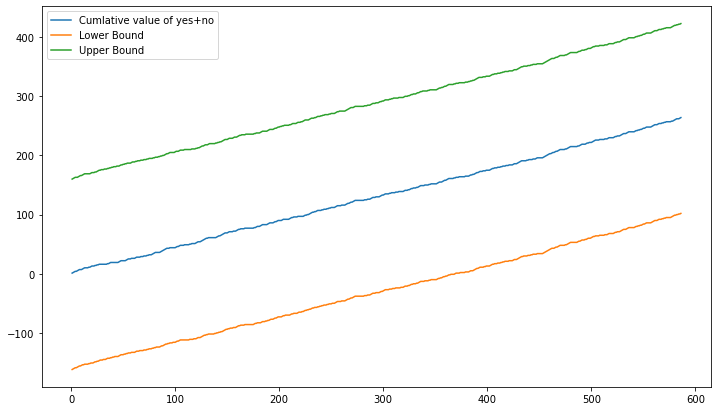

In [12]:
c_sprt.plotExperiment(res)